# 1. Introduction

In the previous mission, we learned some basic techniques and principles for making our plots more aesthetic. `In this mission, we'll focus more directly on customizing colors, line widths, layout, and annotations to improve the ability for a viewer to extract insights from the charts`. We'll continue to use the same data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012

## from previous mission

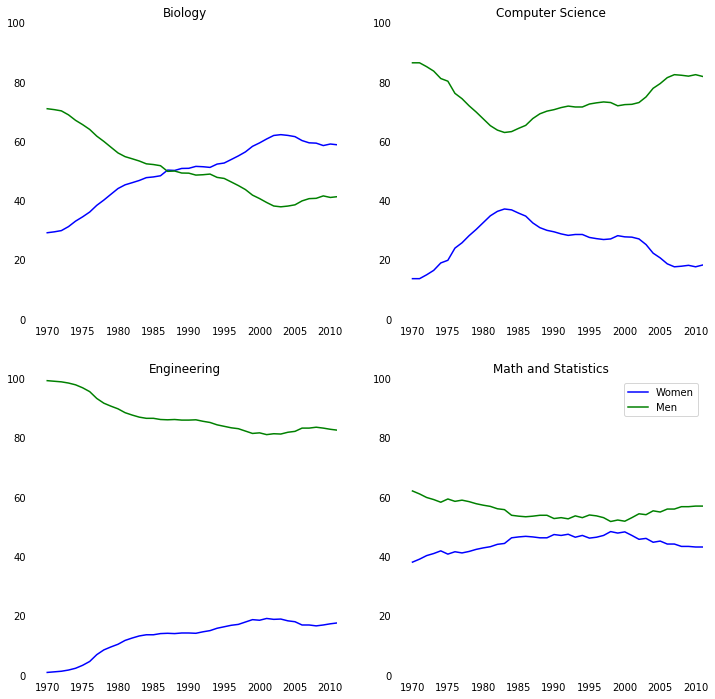

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

# 2. Color

So far, we've been using the [default matplotlib colors](https://matplotlib.org/api/colors_api.html#module-matplotlib.colors) to color the lines in line charts.` When selecting colors, we need to be mindful of people who have some amount of` [color blindness](https://en.wikipedia.org/wiki/Color_blindness). `People who have color blindness have a decreased ability to distinguish between certain kinds of colors.` The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

The [Ishihara test](https://en.wikipedia.org/wiki/Ishihara_test) is a well known test for color blindness, where the person is asked to identify the number in the following image

In [2]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/ishihara_test.png')

People with complete color vision can observe the number 74. Some with partial color blindness see the number 21 instead and those with full color blindness can't see any number at all.

# 3. Setting Line Color Using RGB

The Color Blind 10 palette contains ten colors that are colorblind friendly

In [3]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/tableau_rgb_values.png')

* These numbers represent the RGB values for each color. The [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color
*  In computers, each RGB value can range between 0 and 255. This is because 256 integer values can be represented using 8 bits. You can read more about 8-bit color [here](https://en.wikipedia.org/wiki/8-bit_color).
* **To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255)**

## TODO:
* Modify the starter(above) code to:
  * Set the line color for the line charts visualizing women percentages to the dark blue color from the Color Blind 10 palette (RGB value of (0, 107, 164)). 
  * Set the line color for the line charts visualizing men percentages to the orange color from the Color Blind 10 palette (RGB value of (255, 128, 14)).
* Display the figure after you've made these changes.

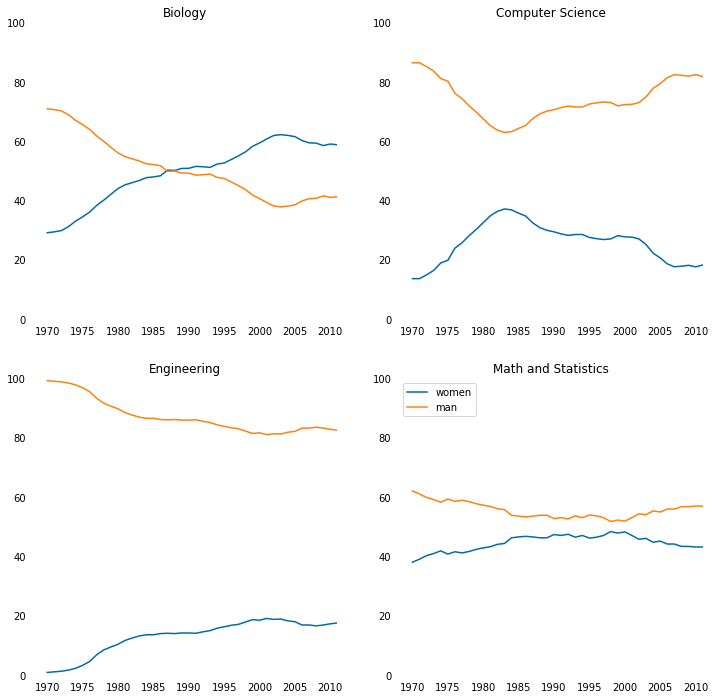

In [4]:
major_cat=['Biology','Computer Science','Engineering','Math and Statistics']
fig=plt.figure(figsize=(12,12))

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

for i in range(0,4):
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees['Year'],women_degrees[major_cats[i]],c=cb_dark_blue,label='women')
    ax.plot(women_degrees['Year'],100-women_degrees[major_cats[i]],c=cb_orange,label='man')
    
    ax.tick_params(top=False,bottom=False,left=False,right=False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cat[i])
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.legend(loc='upper left')

# 4. Setting Line Width

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the Axes.plot() method, we can use the `linewidth` parameter to specify the line width

## TODO:
Modify the starter code to set the line widths for both line charts to 3.

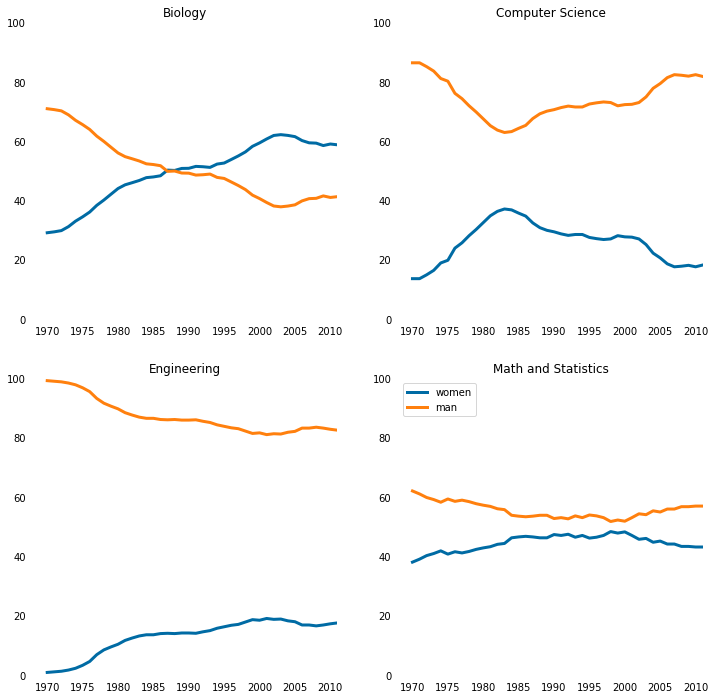

In [5]:
major_cat=['Biology','Computer Science','Engineering','Math and Statistics']
fig=plt.figure(figsize=(12,12))

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

for i in range(0,4):
    ax=fig.add_subplot(2,2,i+1)
    ax.plot(women_degrees['Year'],women_degrees[major_cats[i]],c=cb_dark_blue,label='women',linewidth=3)
    ax.plot(women_degrees['Year'],100-women_degrees[major_cats[i]],c=cb_orange,label='man',linewidth=3)
    
    ax.tick_params(top=False,bottom=False,left=False,right=False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cat[i])
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.legend(loc='upper left')

# 5. Improve the Layout and Ordering

So far, we've been generating our line charts on a 2 by 2 subplot grid. If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

In this exercise, you'll order the charts by decreasing ending gender gap. We've populated the list stem_cats with the six STEM degree categories, ordering them by decreasing ending gender gap. 

In [6]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

## TODO:
Modify the starter code to:
* Change the width of the figure to a width of 18 inches and a height of 3 inches.
* In the for loop, change the range to (0,6) instead of (0,4).
* Change the subplot layout from 2 rows by 2 columns to 1 row by 6 columns.
* Use stem_cats instead of major_cats when generating and setting the titles for the line charts.

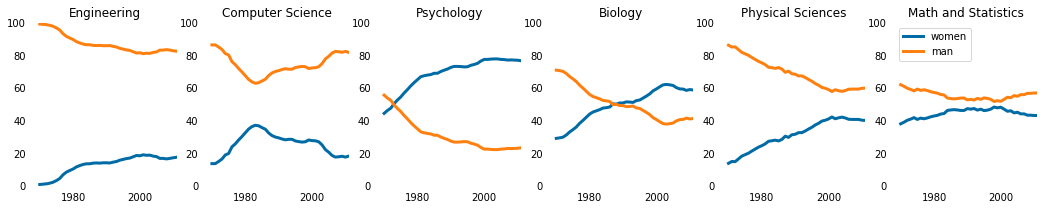

In [7]:
fig=plt.figure(figsize=(18,3))

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

for i in range(0,6):
    ax=fig.add_subplot(1,6,i+1)
    ax.plot(women_degrees['Year'],women_degrees[stem_cats[i]],c=cb_dark_blue,label='women',linewidth=3)
    ax.plot(women_degrees['Year'],100-women_degrees[stem_cats[i]],c=cb_orange,label='man',linewidth=3)
    
    ax.tick_params(top=False,bottom=False,left=False,right=False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[i])
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.legend(loc='upper left')

# 6. Replacing the Legend With Annotations

The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders

# 7. Annotating in Matplotlib

## TODO:
* To add text annotations to a matplotlib plot, we use the `Axes.text()` method. This method has a few required parameters:

  * x: x-axis coordinate (as a float)
  * y: y-axis coordinate (as a float)
  * s: the text we want in the annotation (as a string value)

## TODO:
* Add the following text annotations in the leftmost chart:
  * The string "Men" at the x-axis coordinate of 2005 and the y-axis coordinate of 87.
  * The string "Women" at the x-axis coordinate of 2002 and the y-axis coordinate of 8.
* Add the following text annotations in the rightmost chart:
  * The string "Men" at the x-axis coordinate of 2005 and the y-axis coordinate of 62.
  * The string "Women" at the x-axis coordinate of 2001 and the y-axis coordinate of 35.
* Remove the legend.

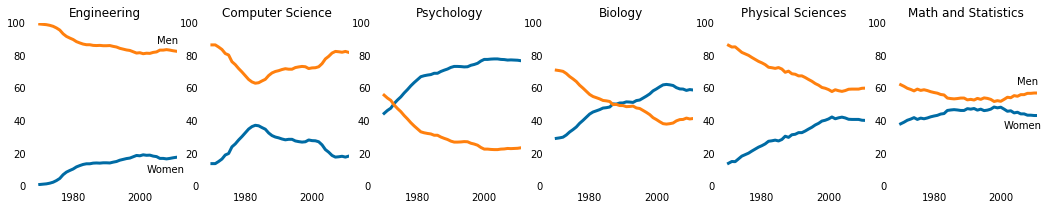

In [8]:
fig=plt.figure(figsize=(18,3))

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

for i in range(0,6):
    ax=fig.add_subplot(1,6,i+1)
    ax.plot(women_degrees['Year'],women_degrees[stem_cats[i]],c=cb_dark_blue,linewidth=3)
    ax.plot(women_degrees['Year'],100-women_degrees[stem_cats[i]],c=cb_orange,linewidth=3)
    
    ax.tick_params(top=False,bottom=False,left=False,right=False)
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[i])
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    if i == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif i == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        

In this mission, we learned how to improve the viewing experience by making our plots more color-blind friendly and thickening the line widths. We then explored how to use the layout and ordering of the plots as well annotations directly onto the plots to enhance the story that's being told to the viewer.